# **Hough Transform**

# Hough Transform is a popular technique to detect any shape,if you can represent that shape in mathematical form. It can detect the shape even if it is broken or distorted a little bit.

**functions: cv2.HoughLines(), cv2.HoughLinesP()**

Sure! Here’s a concise description for each coordinate system:

**Cartesian Coordinate System:** In Hough Transform, a line is represented as y=mx+cy=mx+c, where mm is the slope and cc is the y-intercept.

**Polar Coordinate System:** A line is represented as xcos⁡θ+ysin⁡θ=ρxcosθ+ysinθ=ρ, where ρρ is the perpendicular distance from the origin, and θθ is the angle from the x-axis.

# **types of Hough Transform**

**cv2.HoughLines():** Uses Standard Hough Transform to detect full lines by finding intersections in polar coordinate space.

**cv2.HoughLinesP():** Uses Probabilistic Hough Transform to detect line segments by sampling edge points, optimizing speed.

**cv2.HoughCircles():** Detects circles by identifying circular patterns in the parameter space within a specified radius range.

# **First Type**

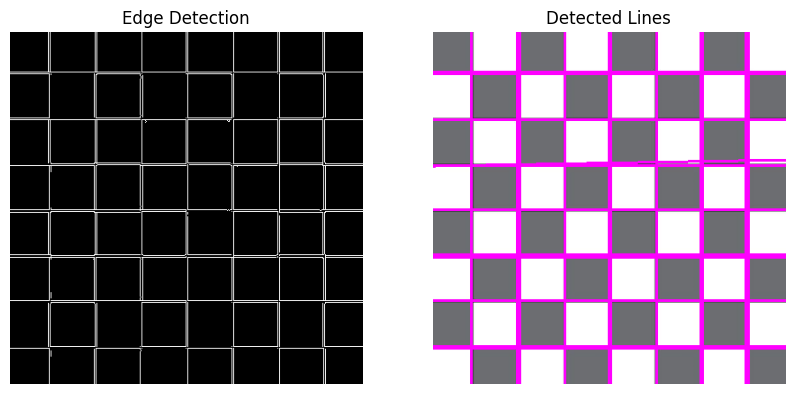

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize the image
img = cv2.imread('/content/chess2.jpg')
if img is None:
    print("Image not found. Check the file path.")
else:
    img = cv2.resize(img, (400, 400))

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 10, 200, apertureSize=3)


    #function accept parameter(img,rho,theta)
    # Detect lines using Hough Transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
    #rho value -- distance resolution of pixels
    #thetha - angle resolution
    #line threshold


    # Draw lines on the original image
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(img, (x1, y1), (x2, y2), (255, 0, 255), 2)

    # Display the results using matplotlib
    plt.figure(figsize=(10, 5))

    # Edge-detected image
    plt.subplot(1, 2, 1)
    plt.imshow(edges, cmap='gray')
    plt.title("Edge Detection")
    plt.axis("off")

    # Image with detected lines
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Detected Lines")
    plt.axis("off")

    plt.show()


# **Second Type**

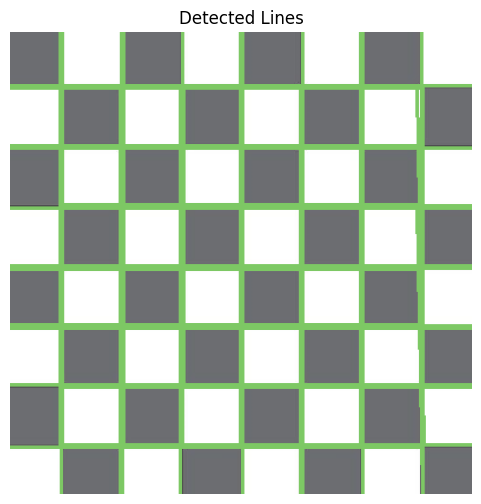

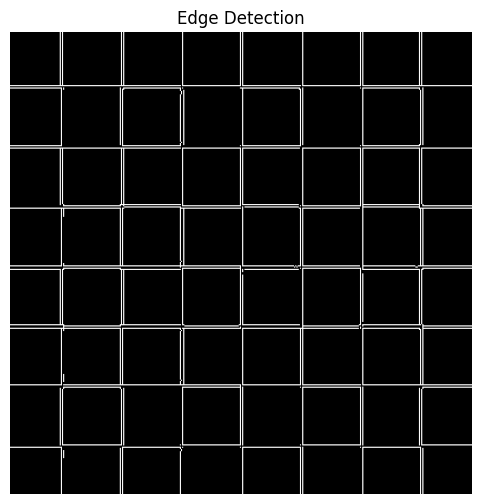

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/chess2.jpg')
if img is None:
    print("Image not found. Check the file path.")
else:
    # Resize and convert to grayscale
    img = cv2.resize(img, (400, 400))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Edge detection
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    # Probabilistic Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=52, maxLineGap=100)

    # Draw lines on the original image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img, (x1, y1), (x2, y2), (100, 200, 125), 2)

    # Convert BGR image to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the final image with lines using matplotlib
    plt.figure(figsize=(6,6))
    plt.imshow(img_rgb)
    plt.title("Detected Lines")
    plt.axis('off')  # Hide axes
    plt.show()

    # Display edges using matplotlib
    plt.figure(figsize=(6,6))
    plt.imshow(edges, cmap='gray')
    plt.title("Edge Detection")
    plt.axis('off')  # Hide axes
    plt.show()


# **Third Type**

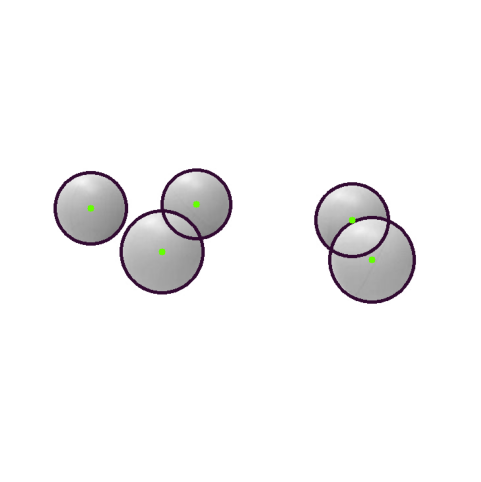

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/ball3.jpg')
if img is None:
    print("Image not found. Check the file path.")
else:
    img2 = img.copy()

    # Convert to grayscale and apply a median blur
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)

    # Hough Circle Transform
    #parameters---(img,circle_method,dp,mindist,parm1,parm2[p1>p2])
    circles = cv2.HoughCircles(
        gray, cv2.HOUGH_GRADIENT, 1, 20,
        param1=50, param2=30, minRadius=0, maxRadius=0
    )

    # If circles are detected, draw them
    if circles is not None:
        data = np.uint16(np.around(circles))
        for (x, y, r) in data[0, :]:
            #cv2.circle(image, center, radius, color, thickness):
            cv2.circle(img2, (x, y), r, (50, 10, 50), 3)  # Outer circle
            cv2.circle(img2, (x, y), 5, (0, 255, 100), -1)  # Center

    # Convert image to RGB format for matplotlib
    img_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Display the result using matplotlib
    plt.figure(figsize=(6,6))
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes
    plt.show()


**NOTE**

So, the two lines of code you asked about:

**Outer circle:** Draws a circle with radius r at (x, y) with a thickness of 3.
    
**Center circle:**Draws a filled circle with radius 5 at (x, y) with a green color.

I hope this clears up the syntax! Let me know if you need any more details.


# **Detect circle on Image You Can Uploaded.**

Saving ball2.jpeg to ball2 (2).jpeg


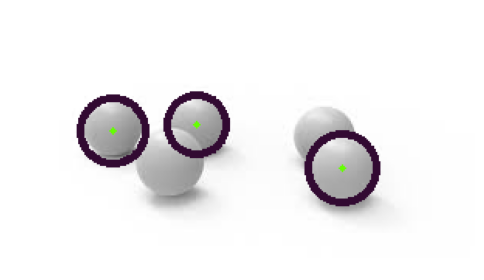

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Upload an image
uploaded = files.upload()

# Assuming you've uploaded an image and it's named 'image.jpg'
img_path = next(iter(uploaded))  # Get the filename of the uploaded image

# Read the image
img = cv2.imread(img_path)
img2 = img.copy()

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply median blur to reduce noise
gray = cv2.medianBlur(gray, 5)

# Detect circles using Hough Circle Transform
#parameters---(img,circle_method,dp,mindist,parm1,parm2[p1<p2],)
circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    1,
    10,
    param1=50,
    param2=30,
    minRadius=0,
    maxRadius=0
)

# If circles are detected, draw them
if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        # Draw the outer circle
        cv2.circle(img2, (x, y), r, (50, 10, 50), 3)
        # Draw the center circle
        cv2.circle(img2, (x, y), 2, (0, 255, 100), -1)

# Convert BGR image to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Display the result using matplotlib
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()
